In [1]:
!pip install scikit-learn-extra

In [2]:
import io
from google.colab import files 
import pandas as pd 
from sklearn import preprocessing
from scipy.spatial import distance
import matplotlib.pyplot as plt 
from sklearn_extra.cluster import KMedoids
import numpy as np
import math

In [3]:
upload = files.upload()

Saving CD_Metabolites_Intensities.xlsx - Health.csv to CD_Metabolites_Intensities.xlsx - Health (1).csv


In [4]:
df = pd.read_csv(io.BytesIO(upload['CD_Metabolites_Intensities.xlsx - Health.csv']))

In [5]:
def fillEmptyListOfLists(num):
  the_list = []
  for i in range(num):
    the_list.append([])
  return the_list

In [6]:
def create3DTimeSeries(df):
  celiac = fillEmptyListOfLists(239)
  healthy = fillEmptyListOfLists(239)
  col_names = list(df.columns)
  col_names.remove('Metabolites')
  for i in range(len(df) - 1):
    count = 0
    current = []
    for sample in col_names:
      health_status = df.loc[239].at[sample]
      current.append(df.loc[i].at[sample])
      if (count == 4):
        count = 0
        if (health_status == 'Celiac'):
          celiac[i].append(current)
        else:
          healthy[i].append(current)
        current = []
      else:
        count += 1
  return celiac, healthy

In [34]:
celiac, healthy = create3DTimeSeries(df)
print(celiac)
print(healthy)

[[['2.94', '3.31', '2.02', '4.88', '5.91'], ['6.52', '2.3', '4.98', '3.25', '3.91'], ['8.84', '6.96', '7.06', '5.04', '4.69'], ['3.77', '2.98', '5.52', '5.75', '3.6']], [['1.1', '1.19', '0.83', '1.72', '1.66'], ['1.84', '0.87', '1.64', '1.18', '1.29'], ['2.35', '2', '2.1', '1.65', '1.56'], ['1.24', '1.05', '1.5', '1.83', '1.3']], [['1.46', '1.76', '1.49', '2.95', '3.59'], ['3.18', '1.54', '2.87', '3.14', '3.27'], ['3.84', '3.54', '4.03', '3.39', '3.07'], ['2.26', '2.1', '2.91', '3.43', '2.73']], [['12.19', '6.5', '1.64', '19.39', '5.35'], ['4.31', '7.37', '16.76', '10.39', '6.77'], ['7.21', '22.8', '21.73', '18.74', '5.77'], ['2.64', '4.46', '15.57', '8.98', '9.17']], [['0.64', '0.18', '0.5', '1.54', '0.27'], ['1.12', '0.48', '1.15', '0.96', '0.16'], ['1.61', '1.62', '2.04', '1.44', '0.22'], ['0.94', '0.08', '1.52', '0.3', '1.19']], [['2.36', '0.07', '1.72', '3.64', '0.17'], ['4.22', '0.95', '3.68', '1.57', '0.01'], ['5.74', '4.69', '4.73', '3.05', '0.03'], ['3', '0.01', '3.58', '0.31'

In [35]:
def getAveragesOfEachTimePoint(matrix):
  solution = []
  for metabolite in matrix:
    current = []
    for i in range(5):
      count = 0
      sum = 0
      for sample in metabolite:
        count += 1
        value = float(sample[i])
        sum += value
      current.append(sum / count)
    solution.append(current)
  return solution

In [36]:
celiacAvg = getAveragesOfEachTimePoint(celiac)
healthyAvg = getAveragesOfEachTimePoint(healthy)
celiacAvg = preprocessing.normalize(celiacAvg)
healthyAvg = preprocessing.normalize(healthyAvg)
print(celiacAvg)
print(healthyAvg)

[[0.52045485 0.36670018 0.46173566 0.44617153 0.42707011]
 [0.48663853 0.38081514 0.45235771 0.47546    0.4329816 ]
 [0.42128828 0.3506813  0.44325489 0.50640891 0.49660238]
 ...
 [0.43507409 0.43507409 0.43507409 0.4434409  0.48527495]
 [0.41811938 0.41811938 0.42616014 0.44224166 0.52264923]
 [0.16084663 0.18559226 0.56296319 0.51965833 0.59389523]]
[[0.39475135 0.45587812 0.47069673 0.47296069 0.43714904]
 [0.36599147 0.44088548 0.47903903 0.46914737 0.47126701]
 [0.42045644 0.4218603  0.46713482 0.51311128 0.404663  ]
 ...
 [0.441636   0.43330324 0.43330324 0.49163253 0.43330324]
 [0.44867532 0.42463914 0.41662708 0.52078385 0.41662708]
 [0.13869699 0.15935398 0.27936131 0.92464657 0.14951732]]


In [10]:
def euclidean_dist(matrix):
  mink_dist = []
  for i in matrix:
    current = []
    for j in matrix:
      current.append(distance.minkowski(i, j, 2))
    mink_dist.append(current)
  return mink_dist

In [11]:
celiacAvg_dist = euclidean_dist(celiacAvg)
healthyAvg_dist = euclidean_dist(healthyAvg)

In [12]:
def elbowMethod(matrix, n, title):
  distortions = []
  K = range(1, n)
  for k in K:
    kmedoid_model = KMedoids(n_clusters = k, init = 'k-medoids++')
    kmedoid_model.fit(matrix)
    distortions.append(kmedoid_model.inertia_)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k - ' + title)
  plt.show()

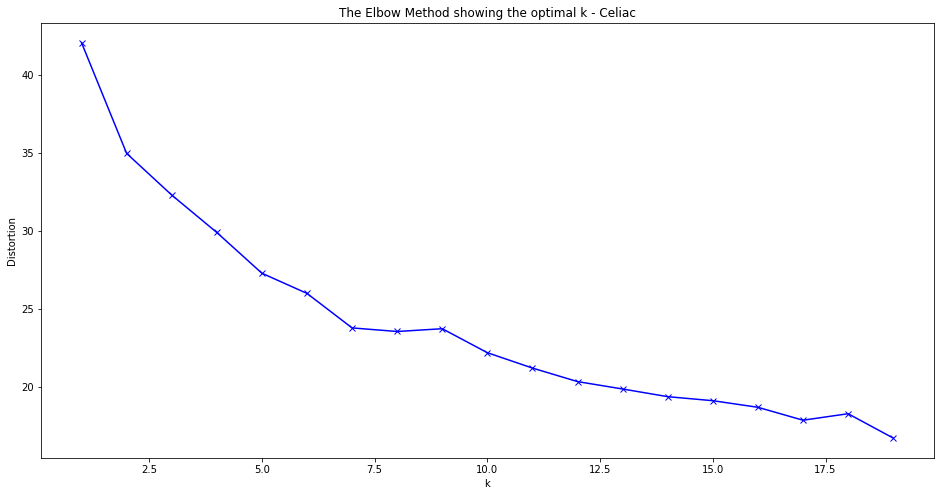

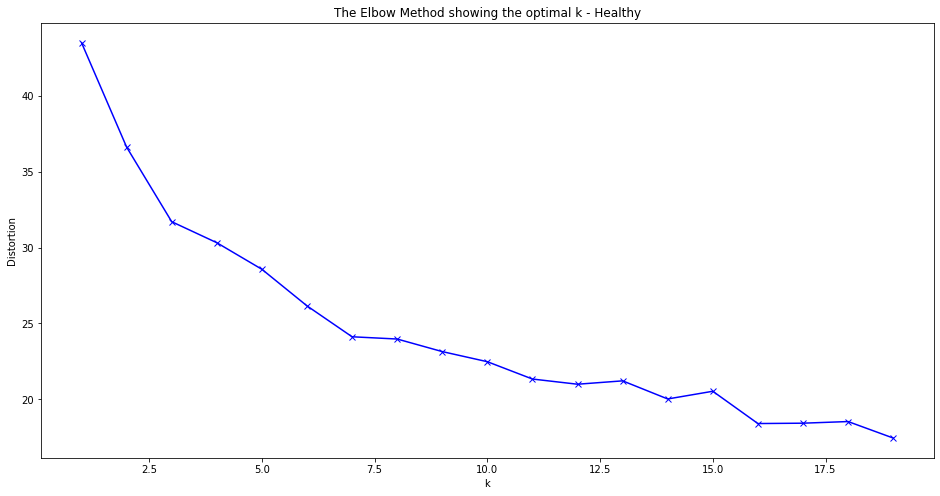

In [13]:
elbowMethod(celiacAvg, 20, 'Celiac')
elbowMethod(healthyAvg, 20, 'Healthy')

In [14]:
celiac = KMedoids(n_clusters = 5, init = 'k-medoids++', metric = 'euclidean')
healthy = KMedoids(n_clusters = 5, init = 'k-medoids++', metric = 'euclidean')
celiac_centers = celiac.fit(celiacAvg)
healthy_centers = healthy.fit(healthyAvg)
celiac_clusters = celiac_centers.labels_
healthy_clusters = healthy_centers.labels_
print(celiac_clusters)
print(healthy_clusters)

[1 1 3 0 4 2 0 3 3 4 3 3 3 4 2 1 2 1 3 1 1 0 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1
 1 3 1 3 4 3 1 0 2 2 0 1 1 1 1 4 1 1 4 4 1 2 2 3 2 4 4 1 2 1 1 4 1 4 2 1 4
 2 1 2 1 4 1 1 1 1 1 1 1 1 1 1 4 4 1 4 1 1 1 4 4 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 1 1 3 1 1 1 1 1 3 1 1 3 1 4 3 1 1 1 1 1 1 1 1 3 3 3 3 3 0 0
 0 0 2 4 1 1 4 3 3 3 3 2 0 0 3 0 0 0 0 2 2 2 1 1 1 1 1 1 3 1 3 1 1 3 3 1 3
 1 1 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 1 0 1 0 4 1 1 4 0 2 1 3
 3 1 3 1 1 4 1 2 1 1 1 4 1 1 1 3 3]
[1 1 1 3 1 1 3 1 1 0 4 4 1 0 0 1 0 1 3 1 3 3 1 1 1 0 3 1 1 3 3 3 1 3 1 1 1
 1 3 3 3 1 0 1 3 0 0 3 1 1 1 1 0 1 1 0 0 0 0 0 1 0 3 1 1 0 3 1 1 1 0 0 3 0
 0 3 3 1 1 1 1 1 1 3 3 1 1 1 1 3 3 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 3 1 2 4 4 0 2 2 3
 3 1 0 1 3 4 1 2 4 4 4 0 0 3 4 3 0 0 0 0 4 3 1 1 4 1 4 4 2 4 4 4 1 2 2 1 4
 1 1 1 2 4 1 1 1 1 2 1 1 1 3 1 0 1 4 4 1 1 2 2 4 4 3 3 3 3 0 1 1 1 1 0 1 4
 4 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 2]


In [15]:
celiac_cluster_centers = celiac_centers.cluster_centers_
healthy_cluster_centers = healthy_centers.cluster_centers_
print(celiac_cluster_centers)
print(healthy_cluster_centers)

[[0.27522458 0.37582391 0.46883083 0.6871124  0.30179799]
 [0.45338556 0.43719322 0.4695779  0.45338556 0.42100088]
 [0.77703934 0.26106065 0.39312662 0.3470571  0.23034763]
 [0.34274011 0.37946226 0.45290657 0.46514729 0.56307304]
 [0.59011811 0.38184113 0.49755057 0.38184113 0.33555736]]
[[0.3096214  0.40779404 0.42289752 0.53617365 0.52107016]
 [0.39475135 0.45587812 0.47069673 0.47296069 0.43714904]
 [0.19803612 0.21158596 0.29236386 0.88542993 0.21575515]
 [0.36929181 0.56512838 0.54834239 0.41405446 0.26857586]
 [0.36155559 0.40287622 0.3822159  0.68179053 0.30990479]]


In [16]:
rows = []
for i in range(len(df)):
  rows.append(df.loc[i].at['Metabolites'])

In [17]:
def timeSeriesClusterValues(timeSeries, clusterMatrix):
  zero, one, two, three, four = [], [], [], [], []
  count = 0
  for num in clusterMatrix:
    if num == 0:
      zero.append(timeSeries[count])
    if num == 1:
      one.append(timeSeries[count])
    if num == 2:
      two.append(timeSeries[count])
    if num == 3:
      three.append(timeSeries[count])
    if num == 4:
      four.append(timeSeries[count])
    count = count + 1
  return zero, one, two, three, four

In [18]:
zeroCeliac, oneCeliac, twoCeliac, threeCeliac, fourCeliac = timeSeriesClusterValues(celiacAvg, celiac_clusters)
zeroHealthy, oneHealthy, twoHealthy, threeHealthy, fourHealthy = timeSeriesClusterValues(healthyAvg, healthy_clusters)

In [19]:
def graphTimeSeries(timeSeries, color, legend_lab, title, show):
  months = [0, 3, 50, 70, 80]
  for tS in range(len(timeSeries) - 1):
    plt.plot(months, timeSeries[tS], c = color)
    plt.xlabel('Months After Birth')
    plt.ylabel('Normalized Metabolite Level')
  plt.plot(months, timeSeries[len(timeSeries) - 1], c = color, label = legend_lab)
  plt.legend(loc = 'upper left')
  plt.title(title)
  if show:
    plt.show()

In [20]:
def metabolitesInEachCluster(rows, clusters):
  labels = {0:[], 1:[], 2:[], 3:[], 4:[]}
  count = 0
  for i in clusters:
    labels[i].append(rows[count])
    count = count + 1
  return labels

In [21]:
metabolites_in_clusters_celiac = metabolitesInEachCluster(rows, celiac_clusters)
print(metabolites_in_clusters_celiac)
metabolites_in_clusters_healthy = metabolitesInEachCluster(rows, healthy_clusters)
print(metabolites_in_clusters_healthy)

{0: ['CE(18:2)', 'CE(20:5)', 'PC(18:0p/22:6)', 'PC(34:3)', 'PC(36:4)', 'PC(36:5)', 'TG(16:0/18:2/18:2)', 'TG(16:0/18:2/18:2)', 'TG(16:0/18:2/18:3)', 'TG(16:0/18:2/18:3)', 'TG(18:1/18:2/18:2)', 'TG(18:1/18:2/18:2)', 'TG(18:2/18:1/18:1)', 'TG(18:2/18:1/18:1)', 'TG(18:2/18:2/18:2) or TG(18:3/18:2/18:1)', 'TG(18:2/18:2/18:2) or TG(18:3/18:2/18:1)', 'TG(54:4)', 'TG(54:4)', 'TG(54:7)'], 1: ['CE(16:0)', 'CE(16:0)', 'LPC(22:6)', 'PC(16:0/18:1)', 'PC(18:0/18:0)', 'PC(18:0p/18:1(9Z))', 'PC(30:0)', 'PC(31:0)', 'PC(31:0)', 'PC(32:2)', 'PC(33:0)', 'PC(33:1)', 'PC(34:2)', 'PC(34:3)', 'PC(35:1)', 'PC(35:2)', 'PC(35:3)', 'PC(35:3)', 'PC(35:3)', 'PC(35:4)', 'PC(36:2)', 'PC(36:4)', 'PC(37:2)', 'PC(37:3)', 'PC(37:3)', 'PC(37:3)', 'PC(37:5)', 'PC(37:5)', 'PC(38:2)', 'PC(38:6)', 'PC(38:6)', 'PC(39:6)', 'PC(40:4)', 'PC(40:5)', 'PC(40:6)', 'PC(40:7)', 'PC(40:8)', 'PC(42:5)', 'PC(O-32:0)', 'PC(O-32:1)', 'PC(O-34:2)', 'PC(O-34:3)', 'PC(O-36:3)', 'PC(O-36:3)', 'PC(O-36:3)', 'PC(O-36:3)', 'PC(O-36:4)', 'PC(O-38:

In [22]:
def clusterMetaboliteCounts(cluster_names):
  counts = {'CE':0, 'LPC':0, 'PC':0, 'PE':0, 'SM':0, 'TG':0}
  for i in cluster_names:
    name = str(i[0] + i[1])
    if (name == 'CE'):
      counts['CE'] += 1
    if (name == 'LP'):
      counts['LPC'] += 1
    if (name == 'PC'):
      counts['PC'] += 1
    if (name == 'PE'):
      counts['PE'] += 1
    if (name == 'SM'):
      counts['SM'] += 1
    if (name == 'TG'):
      counts['TG'] += 1
  return counts

In [23]:
zero_celiac_counts = clusterMetaboliteCounts(metabolites_in_clusters_celiac[0])
print(zero_celiac_counts)
one_celiac_counts = clusterMetaboliteCounts(metabolites_in_clusters_celiac[1])
print(one_celiac_counts)
two_celiac_counts = clusterMetaboliteCounts(metabolites_in_clusters_celiac[2])
print(two_celiac_counts)
three_celiac_counts = clusterMetaboliteCounts(metabolites_in_clusters_celiac[3])
print(three_celiac_counts)
four_celiac_counts = clusterMetaboliteCounts(metabolites_in_clusters_celiac[4])
print(four_celiac_counts)

{'CE': 2, 'LPC': 0, 'PC': 4, 'PE': 0, 'SM': 0, 'TG': 13}
{'CE': 2, 'LPC': 1, 'PC': 57, 'PE': 8, 'SM': 18, 'TG': 43}
{'CE': 1, 'LPC': 1, 'PC': 11, 'PE': 0, 'SM': 0, 'TG': 7}
{'CE': 1, 'LPC': 5, 'PC': 5, 'PE': 0, 'SM': 4, 'TG': 29}
{'CE': 1, 'LPC': 2, 'PC': 16, 'PE': 0, 'SM': 1, 'TG': 6}


In [24]:
zero_healthy_counts = clusterMetaboliteCounts(metabolites_in_clusters_healthy[0])
print(zero_healthy_counts)
one_healthy_counts = clusterMetaboliteCounts(metabolites_in_clusters_healthy[1])
print(one_healthy_counts)
two_healthy_counts = clusterMetaboliteCounts(metabolites_in_clusters_healthy[2])
print(two_healthy_counts)
three_healthy_counts = clusterMetaboliteCounts(metabolites_in_clusters_healthy[3])
print(three_healthy_counts)
four_healthy_counts = clusterMetaboliteCounts(metabolites_in_clusters_healthy[4])
print(four_healthy_counts)

{'CE': 0, 'LPC': 3, 'PC': 17, 'PE': 0, 'SM': 1, 'TG': 15}
{'CE': 5, 'LPC': 4, 'PC': 51, 'PE': 7, 'SM': 21, 'TG': 38}
{'CE': 0, 'LPC': 0, 'PC': 0, 'PE': 0, 'SM': 0, 'TG': 12}
{'CE': 2, 'LPC': 0, 'PC': 25, 'PE': 1, 'SM': 1, 'TG': 11}
{'CE': 0, 'LPC': 2, 'PC': 0, 'PE': 0, 'SM': 0, 'TG': 22}


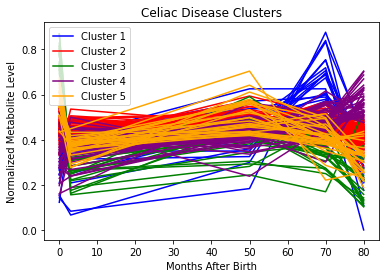

In [25]:
graphTimeSeries(zeroCeliac, 'blue', 'Cluster 1', 'Celiac Disease Clusters', False)
graphTimeSeries(oneCeliac, 'red', 'Cluster 2', 'Celiac Disease Clusters', False)
graphTimeSeries(twoCeliac, 'green', 'Cluster 3', 'Celiac Disease Clusters', False)
graphTimeSeries(threeCeliac, 'purple', 'Cluster 4', 'Celiac Disease Clusters', False)
graphTimeSeries(fourCeliac, 'orange', 'Cluster 5', 'Celiac Disease Clusters', False)
plt.show()

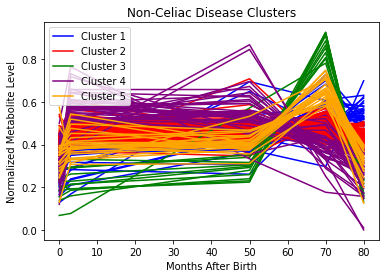

In [26]:
graphTimeSeries(zeroHealthy, 'blue', 'Cluster 1', 'Non-Celiac Disease Clusters', False)
graphTimeSeries(oneHealthy, 'red', 'Cluster 2', 'Non-Celiac Disease Clusters', False)
graphTimeSeries(twoHealthy, 'green', 'Cluster 3', 'Non-Celiac Disease Clusters', False)
graphTimeSeries(threeHealthy, 'purple', 'Cluster 4', 'Non-Celiac Disease Clusters', False)
graphTimeSeries(fourHealthy, 'orange', 'Cluster 5', 'Non-Celiac Disease Clusters', False)
plt.show()

In [27]:
def graphingClusterCenters(clusterCenters, title):
  months = [0, 3, 50, 70, 80]
  count = 1
  colors = ['blue', 'red', 'green', 'purple', 'orange']
  for center in clusterCenters:
    lab = 'Cluster ' + str(count)
    plt.plot(months, center, label = lab, c = colors[count - 1])
    #m, b = np.polyfit(months, center, 1)
    #month_array = np.array(months)
    #plt.plot(months, (m * month_array) + b, c = colors[count - 1])
    plt.xlabel('Months After Birth')
    plt.ylabel('Normalized Metabolite Level')
    plt.ylim(0, 1.0)
    count = count + 1
  plt.title(title)
  plt.legend(loc = 'upper left')
  plt.show()

In [28]:
def graphSingle(clusterCenterCD, clusterCenterNon, title):
  months = [0, 3, 50, 70, 80]
  for clusterCenter in clusterCenterCD:
    plt.plot(months, clusterCenter, 'r--', color = 'green')
  plt.plot(months, clusterCenterCD[0], 'r--', color = 'green', label = 'Celiac')
  for clusterCenter in clusterCenterNon:
    plt.plot(months, clusterCenter, 'r--', color = 'blue')
  plt.plot(months, clusterCenterNon[0], 'r--', color = 'blue', label = 'Non-Celiac')
  plt.title(title)
  plt.legend(loc = 'upper left')
  plt.xlabel('Months After Birth')
  plt.ylabel('Normalized Metabolite Level')
  plt.show()

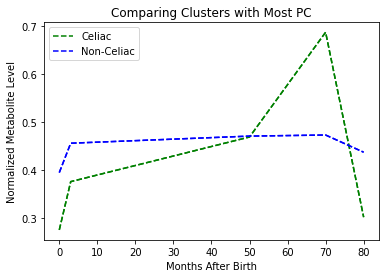

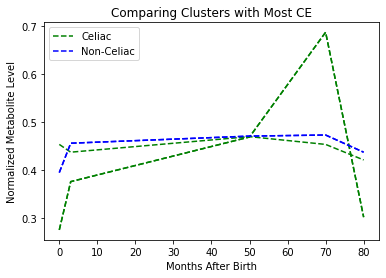

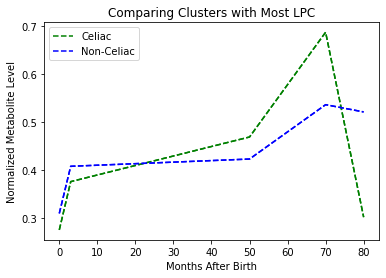

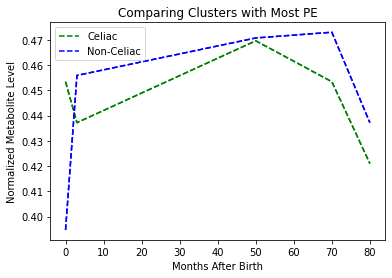

In [31]:
graphSingle([celiac_cluster_centers[0]], [healthy_cluster_centers[1]], 'Comparing Clusters with Most PC')
graphSingle([celiac_cluster_centers[0], celiac_cluster_centers[1]], [healthy_cluster_centers[1]], 'Comparing Clusters with Most CE')
graphSingle([celiac_cluster_centers[0]], [healthy_cluster_centers[0]], 'Comparing Clusters with Most LPC')
graphSingle([celiac_cluster_centers[1]], [healthy_cluster_centers[1]], 'Comparing Clusters with Most PE')

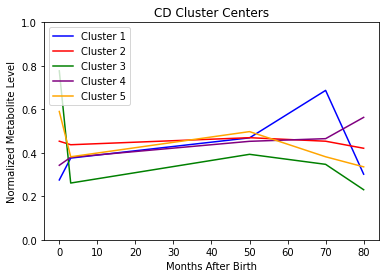

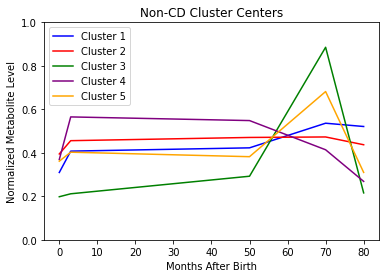

In [30]:
graphingClusterCenters(celiac_cluster_centers, 'CD Cluster Centers')
graphingClusterCenters(healthy_cluster_centers, 'Non-CD Cluster Centers')